In [1]:
import pandas as pd

# Analysis of Variance

(https://www.reneshbedre.com/blog/anova.html)

- Used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
- Groups mean differences inferred by analyzing variances
- ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F test is also called omnibus test (all groups means are equal on null hypothesis)
- If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA.

## Hypothesis

- NUll: groups means are equal
- Alternative: At least, one group mean is different from other groups

Normally after identified that there is difference between the groups, we perform a post-hoc test to see individual group differences.

## Difference between Parametric and Non-Parametric tests

In **parametric** we assume underlying statistical distributions in the data. Therefore, several conditions of validity must be met so that the result of parametric test is reliable. **Non-parametric** tests do not rely on any distribution.

Parametric tests normally have more statistical power than non-parametric, in other words, parametric tests are more able to lead to a rejection of H0.

## ANOVA Assumptions

- Residuals approximately normally distributed (shapiro-wilks tests)
- Homoscedasticity or Homogeneity of variances (Levene's or Barlett's Test)
- Independent groups
- Dependent variable continuous.

In [12]:
# anova example
dataset = pd.read_csv("../../data/onewayanova.txt", sep="\t")

In [13]:
dataset

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [14]:
# reshape the dataframe for statmodels
df_melted = pd.melt(dataset.reset_index(), id_vars=["index"], value_vars=["A", "B", "C", "D"])
df_melted.columns = ["index", "treatments", "value"]
df_melted

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


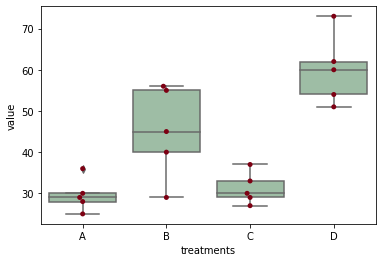

In [16]:
# looking at the boxplot of those variables
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(x="treatments", y="value", data=df_melted, color="#99c2a2")
ax = sns.swarmplot(x="treatments", y="value", data=df_melted, color="#7d0013")
plt.show()

In [18]:
# doing the ANOVA
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(dataset["A"], dataset["B"], dataset["C"], dataset["D"])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [19]:
# result similar to R table
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("value ~ C(treatments)", data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN
